Задание 2.7
1/1 point (graded)

Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.



In [1]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [2]:
df = pd.read_csv('data/values_from_the_instrument.csv')
df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<Axes: xlabel='x1', ylabel='x2'>

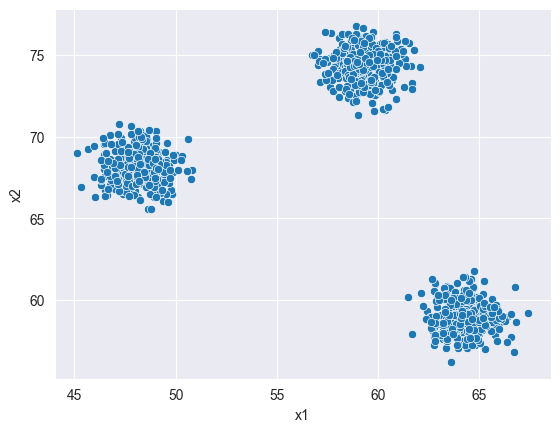

In [5]:
# попробуем кластеризовать покемонов по их силе атаки и защиты
# для этого сохраним в матрицу X 2 интересующих признака: атаку и защиту
X = df[['x1', 'x2']]

#визуализируем
sns.scatterplot(x=df.x1, y=df.x2)

<Axes: xlabel='cluster', ylabel='silhouette'>

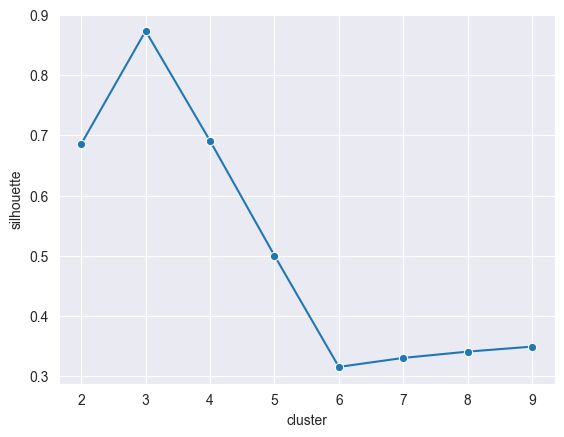

In [4]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df[['x1', 'x2']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Задание 3.3
1 point possible (graded)
Для пяти объектов вы провели кластеризацию k-means. Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.

Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, округлив его до второго знака после точки-разделителя.

In [6]:
# импортируем подсчет метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию к какому кластеру относятся объекты датасета и правильные ответы
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016


Задание 5.4
1 point possible (graded)
Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

In [7]:
df = pd.read_csv('data/housing.csv')
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


In [8]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture


gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(df)

# для матрицы X получаем предсказания к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(df)

<Axes: xlabel='year', ylabel='price'>

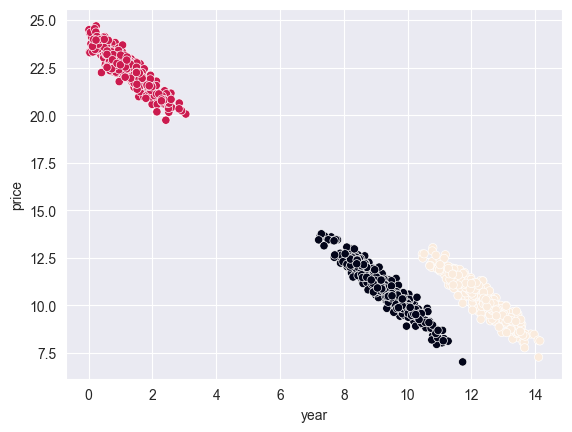

In [13]:
# sns.set_style("white")
sns.scatterplot(x=df.year, y=df.price, c=gm_prediction)

<Axes: xlabel='cluster', ylabel='silhouette'>

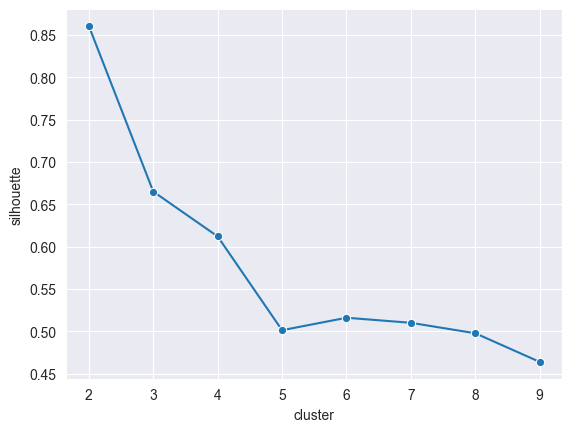

In [11]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    gmm =  GaussianMixture(n_components=cluster_num,random_state=42)
    gmm.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, gmm.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = df

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

<Axes: xlabel='price', ylabel='year'>

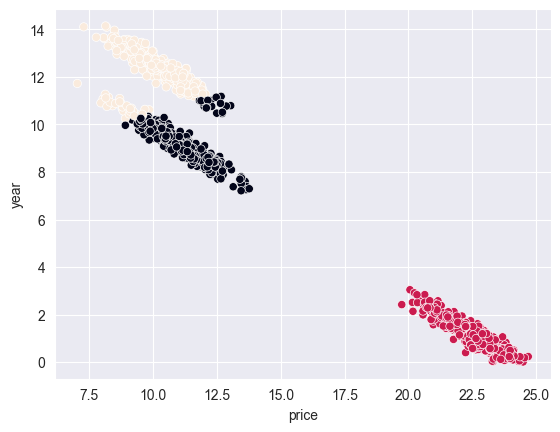

In [15]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(df)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(df)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.price, y=df.year, c=predictions)

Задание 7.5
1 point possible (graded)
Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. Визуализируйте результаты. Сколько точек было размечено как выбросы?

<Axes: xlabel='year', ylabel='price'>

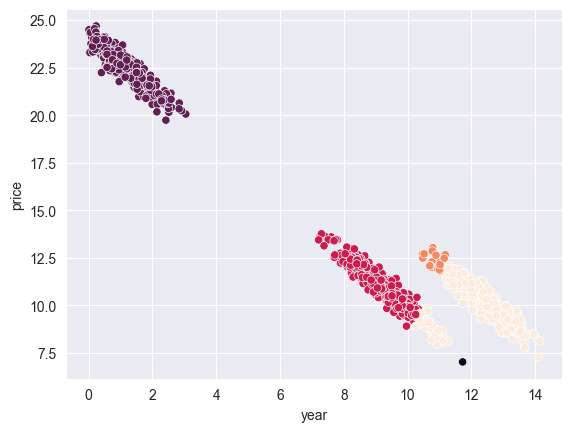

In [22]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps = 1.15, min_samples = 2).fit(df)

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.year, y=df.price, c=clustering.labels_)